In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
trans={1:'fraud', 0:'genuine'}

In [5]:
df['Class']=df['Class'].apply(lambda x:trans[x])

In [6]:
from sklearn.manifold import TSNE 

In [7]:
scaler=StandardScaler()

In [8]:
labels=df['Class']

In [9]:
data=df.drop(['Class', 'Amount', 'Time'],axis=1)

In [10]:
std_data=scaler.fit_transform(data)

In [11]:
import numpy as np

In [12]:
np.shape(std_data)

(284807, 28)

In [103]:
p= 75   # perplexity
n=3000  # steps
n_data=20000 # data points

keep perplexity lesser than number of fraudulent transactions

## Keep number of data points and steps fixed and vary perplexity

In [104]:
np.shape(np.where(labels[:n_data]=='fraud'))

(1, 85)

In [105]:
model=TSNE(perplexity=p, n_iter=n, random_state=0)

In [106]:
vec_2d=model.fit_transform(std_data[:n_data])

In [107]:
output=np.vstack((vec_2d.T, labels[:n_data])).T

In [108]:
plot=pd.DataFrame(data=output, columns=['d1', 'd2', 'label'])

In [31]:
sns.set_style("whitegrid")

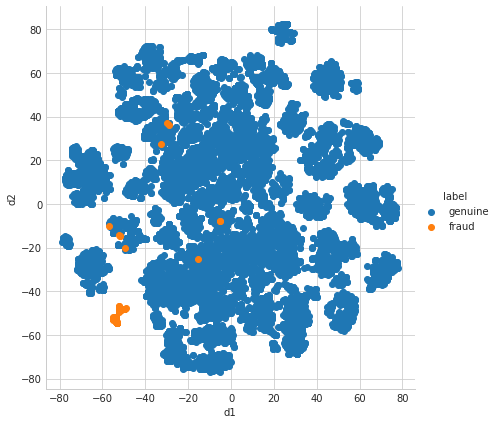

In [32]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 30
num_data_points=20k
steps=1000

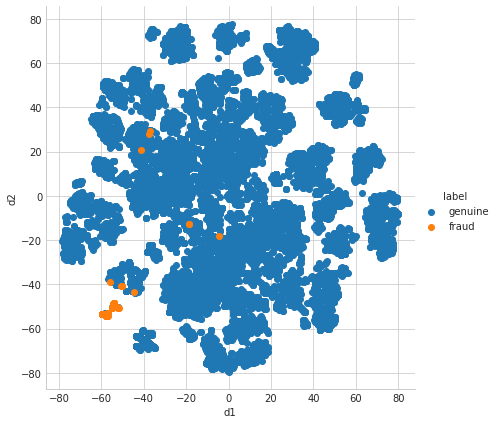

In [39]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 50
num_data_points=20k
steps=1000

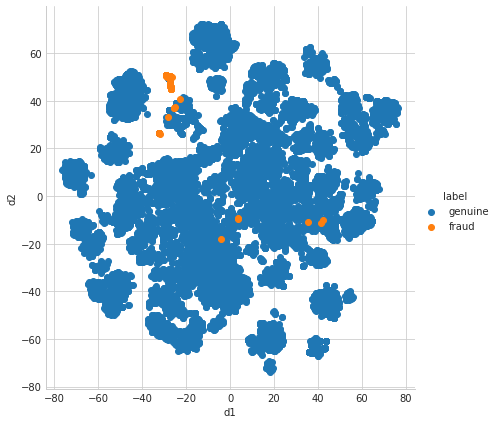

In [46]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 70
num_data_points=20k
steps=1000

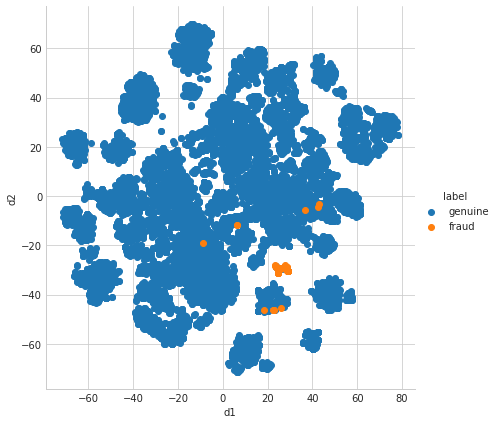

In [81]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 80
num_data_points=20k
steps=1000

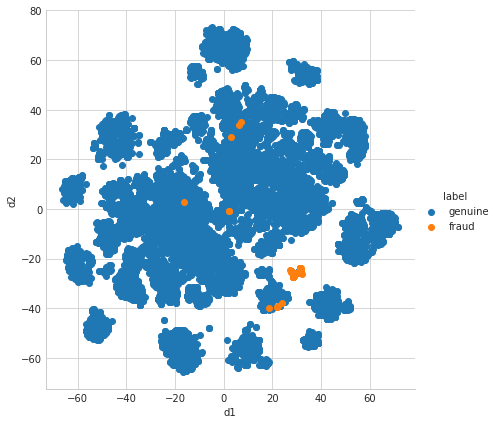

In [88]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 100
num_data_points=20k
steps=1000

## Conclusion
As soon as p exceeds number of fraudulent transactions, more number of clusters of fraudulent transactions start forming. Hence the ideal value of p lies between 70 and 80.

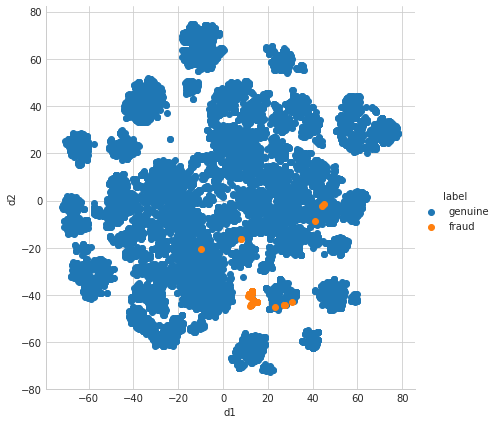

In [95]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 75
num_data_points=20k
steps=1000

## Finding saturation value of step
Optimal perplexity = 75

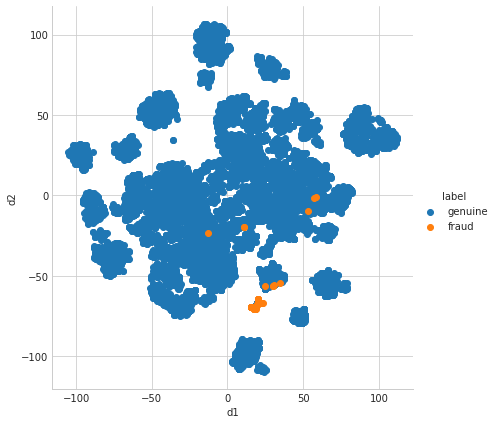

In [102]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

step=2000

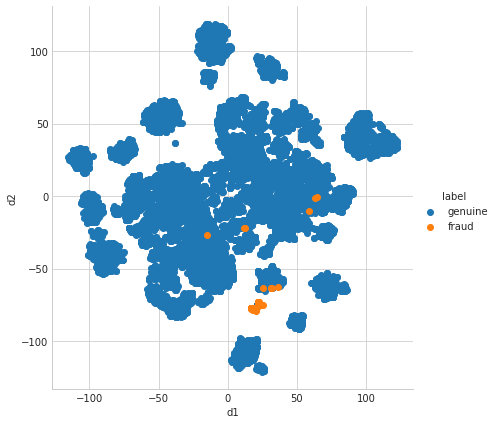

In [109]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

step=3000<br>
Since not much difference in shapes is visible to the naked eye it is safe to conclude a saturation limit of 2000 steps

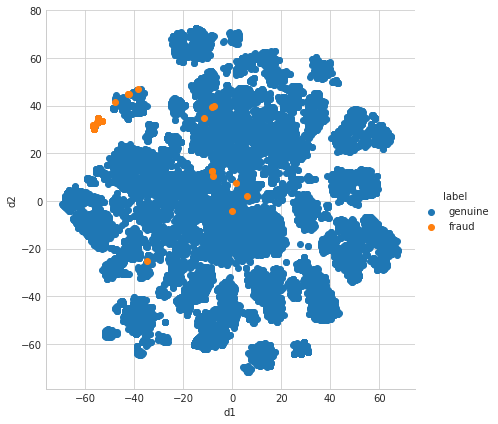

In [53]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 70
num_data_points=30k
steps=1000

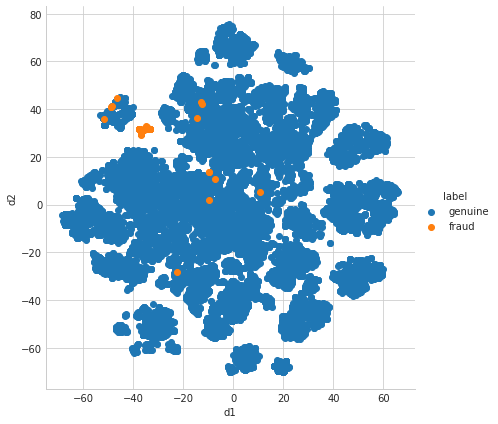

In [60]:
sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

perplexity = 70
num_data_points=30k
steps=1000

# Testing the observed values on larger dataset

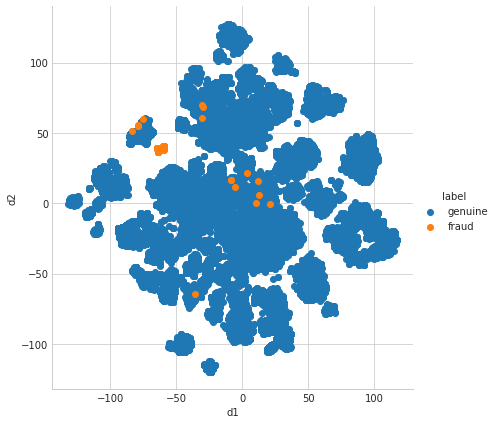

In [110]:
p= 75   # perplexity
n=2000  # steps
n_data=40000 # data points

model=TSNE(perplexity=p, n_iter=n, random_state=0)

vec_2d=model.fit_transform(std_data[:n_data])

output=np.vstack((vec_2d.T, labels[:n_data])).T

plot=pd.DataFrame(data=output, columns=['d1', 'd2', 'label'])

sns.FacetGrid(plot, hue='label', size=6).map(plt.scatter, 'd1', 'd2').add_legend()
plt.show()

# Observations
The value of perplexity and step determined for smaller dataset is not working well with larger dataset. This is obvious as number of fraudulent transactions in larger dataset is more than that in smaller.<br>
However these values work well for smaller dataset of 20k datapoints.